<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [13]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [14]:
import pandas as pd
import pandas as pd`
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [15]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [16]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [17]:
chas_1 = df[df['CHAS'] == 1]['MEDV']
chas_0 = df[df['CHAS'] == 0]['MEDV']

t_stat,p_value = scipy.stats.ttest_ind(chas_0,chas_1)
t_stat, p_value


(-3.996437466090509, 7.390623170519905e-05)

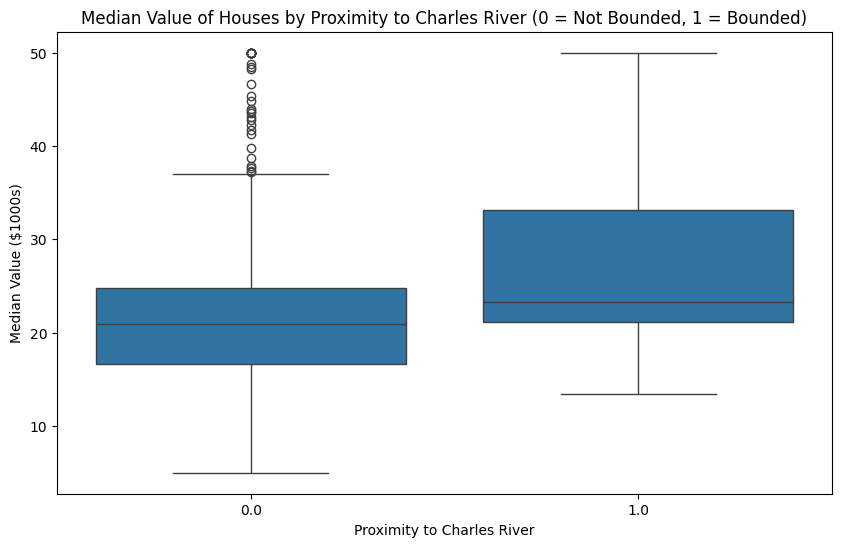

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CHAS'], y=df['MEDV'])
plt.title('Median Value of Houses by Proximity to Charles River (0 = Not Bounded, 1 = Bounded)')
plt.xlabel('Proximity to Charles River')
plt.ylabel('Median Value ($1000s)')
plt.show()


In [19]:
df['AGE_Bin'] = pd.cut(df['AGE'], bins=[0, 25, 50, 75, 100], labels=['0-25%', '26-50%', '51-75%', '76-100%'])
age_medv_mean = df.groupby('AGE_Bin')['MEDV'].mean()

<ipython-input-19-bfe1232b1439>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_medv_mean = df.groupby('AGE_Bin')['MEDV'].mean()


In [20]:
age_medv_mean

AGE_Bin
0-25%      27.646939
26-50%     26.216327
51-75%     24.713402
76-100%    19.391221
Name: MEDV, dtype: float64

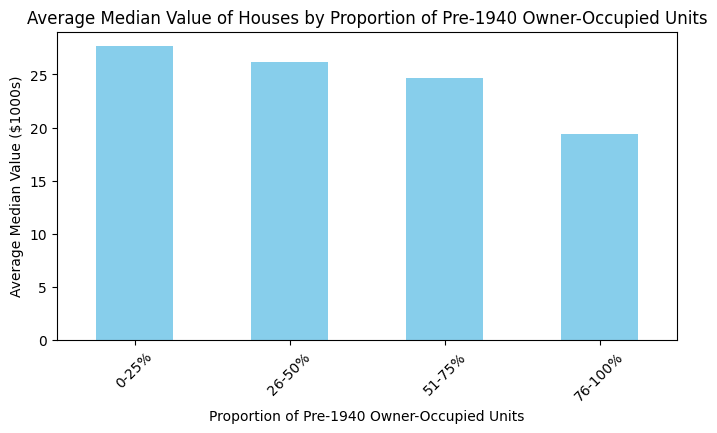

In [35]:
plt.figure(figsize=(8,4))
age_medv_mean.plot(kind='bar', color='skyblue')
plt.title('Average Median Value of Houses by Proportion of Pre-1940 Owner-Occupied Units')
plt.xlabel('Proportion of Pre-1940 Owner-Occupied Units')
plt.ylabel('Average Median Value ($1000s)')
plt.xticks(rotation=45)
plt.show()

In [38]:
correlation_nox_indus, p_value_nox_indus = scipy.stats.pearsonr(df['NOX'], df['INDUS'])
correlation_nox_indus, p_value_nox_indus

(0.7636514469209192, 7.913361061210442e-98)

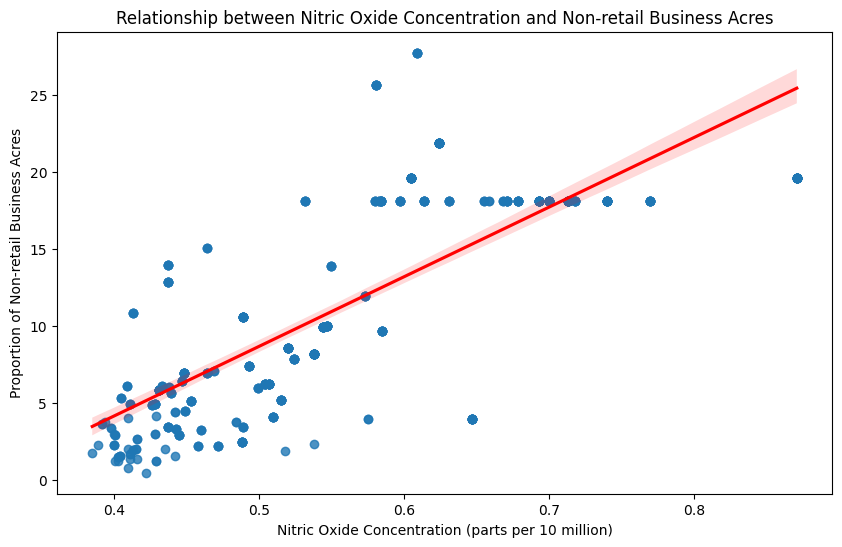

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='NOX', y='INDUS', data=df, line_kws={"color": "red"})
plt.title('Relationship between Nitric Oxide Concentration and Non-retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-retail Business Acres')
plt.show()

In [43]:
ols_model = ols('MEDV ~ DIS', data=df).fit()


# Print the summary of the regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        13:57:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

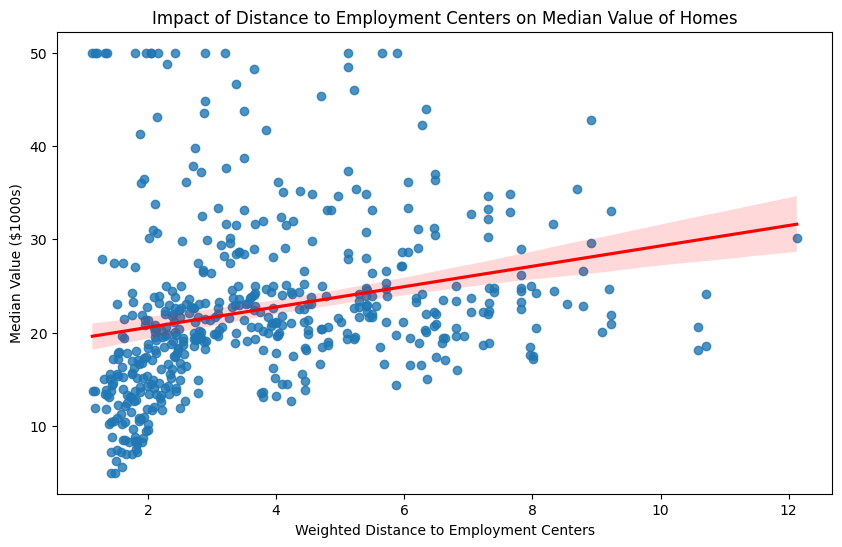

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x='DIS', y='MEDV', data=df, line_kws={"color": "red"})
plt.title('Impact of Distance to Employment Centers on Median Value of Homes')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Value ($1000s)')
plt.show()

In [46]:
results_summary = {
    "Question 1": f"T-test statistic: {t_stat:.2f}, P-value: {p_value:.4f}",
    "Question 3": f"Pearson Correlation: {correlation_nox_indus:.2f}, P-value: {p_value_nox_indus:.4f}",
    "Question 4": f"Linear Regression Slope: {ols_model.params['DIS']}, Intercept: {ols_model.params['Intercept']}"
}

print("Results Summary:")
for key, value in results_summary.items():
    print(f"{key}: {value}")

Results Summary:
Question 1: T-test statistic: -4.00, P-value: 0.0001
Question 3: Pearson Correlation: 0.76, P-value: 0.0000
Question 4: Linear Regression Slope: 1.091613015841107, Intercept: 18.390088330493377
